In [6]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


Bism  
# Imports

In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import sklearn.metrics as sklm
from sklearn.manifold import TSNE

# Implementation 9  (PHONE LEVEL)
## Using Cambridge as Training set
## Cambridge as Test set
## OSVM

In [8]:
phones = [file[:-4] for file in os.listdir('./drive/My Drive/Thesis Work/Cambridge Phones/')]
len(phones)

42

In [0]:
phone = 'L'

### Training

#### X_TRAIN, X_TEST & Y_TEST

In [10]:
X = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+phone+'.npy')
X = X.reshape(X.shape[0],-1)
X.shape

(1093, 1950)

90% for Train

In [0]:
np.random.shuffle(X)

In [12]:
X_train = X[:int(np.ceil(X.shape[0]*0.9))]
X_test = X[int(np.ceil(X.shape[0]*0.9)):]
y_test = np.ones(X_test.shape[0])
X_train.shape[0]+X_test.shape[0]

1093

In [13]:
y_test.shape

(109,)

In [0]:
for p in phones:
  if p != phone:
    notPhone = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+p+'.npy')
    notPhone = notPhone.reshape(notPhone.shape[0],-1)
    np.random.shuffle(notPhone)
    X_test = np.vstack((X_test,notPhone[:int(np.ceil(y_test.shape[0]/41))]))

In [15]:
y_test = np.hstack((y_test,np.zeros(int(np.ceil(y_test.shape[0]/41)*41))))
y_test.shape

(232,)

In [16]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
X_test.shape

(232, 1950)

In [18]:
X_train.shape

(984, 1950)

#### Visualising the features

In [0]:
def plotTrainTestScatter(phone, phones):
  print("Phone: ",phone)
  X = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+phone+'.npy')
  X = X.reshape(X.shape[0],-1)
  np.random.shuffle(X)
  
  X_train = X[:int(np.ceil(X.shape[0]*0.9))]
  X_test = X[int(np.ceil(X.shape[0]*0.9)):]
  y_test = np.ones(X_test.shape[0])
  
  for p in phones:
    if p != phone:
      notPhone = np.load('./drive/My Drive/Thesis Work/Cambridge Phones/'+p+'.npy')
      notPhone = notPhone.reshape(notPhone.shape[0],-1)
      np.random.shuffle(notPhone)
      X_test = np.vstack((X_test,notPhone[:int(np.ceil(y_test.shape[0]/41))]))
  
  y_test = np.hstack((y_test,np.zeros(int(np.ceil(y_test.shape[0]/41))*41)))

  X_test2D = TSNE(n_components=2).fit_transform(X_test)
  X_train2D = TSNE(n_components=2).fit_transform(X_train)

  print(X_train2D.shape)
  print(X_test2D.shape)

  plt.scatter(X_train2D[:, 0], X_train2D[:, 1],c='g')
  plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0],c='r')
  plt.scatter(X_test2D[:, 0][y_test == 1], X_test2D[:, 1][y_test == 1],c='b')

Phone:  R
(956, 2)
(229, 2)


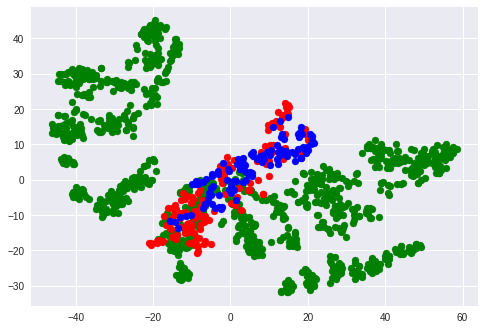

In [0]:
plotTrainTestScatter(phone,phones)

#### PCA

In [20]:
X_train.shape

(984, 1950)

In [0]:
n_components = min(X_train.shape[0],X_train.shape[1])
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

<BarContainer object of 984 artists>

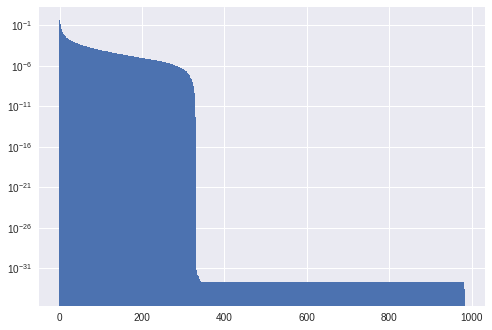

In [22]:
plt.bar(range(n_components),pca.explained_variance_ratio_,1,log=True)

In [0]:
n_components = 320
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MODEL

In [25]:
clf = svm.OneClassSVM(nu=0.1,kernel='rbf')
clf = clf.fit(X_train_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
y_pred = clf.predict(X_test_pca) #pca ones here also

In [0]:
y_pred[y_pred == -1] = 0

In [28]:
print("Phone: ",phone)
print(classification_report(y_test, y_pred, target_names=['Mispronounced','Correct']))
print(confusion_matrix(y_test, y_pred, labels=range(2)))

print(sklm.roc_curve(y_test,y_pred))
print('FAR = ', sklm.roc_curve(y_test,y_pred)[0][1]*100,'%')
print('FRR = ', (1 - sklm.roc_curve(y_test,y_pred)[1][1])*100,'%')
print("AUC_SCORE = ", sklm.roc_auc_score(y_test,y_pred)*100,'%')

Phone:  L
               precision    recall  f1-score   support

Mispronounced       0.79      0.66      0.72       123
      Correct       0.67      0.80      0.73       109

    micro avg       0.72      0.72      0.72       232
    macro avg       0.73      0.73      0.72       232
 weighted avg       0.73      0.72      0.72       232

[[81 42]
 [22 87]]
(array([0.        , 0.34146341, 1.        ]), array([0.        , 0.79816514, 1.        ]), array([2, 1, 0]))
FAR =  34.146341463414636 %
FRR =  20.18348623853211 %
AUC_SCORE =  72.83508614902662 %
